# <font color='056938'> **Caso de Estudio** </font>
---


In [656]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


C:\Users\cr-19\AppData\Roaming\Python\Python310\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\cr-19\AppData\Roaming\Python\Python310\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\cr-19\AppData\Roaming\Python\Python310\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [657]:
# Ignorar warnings

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

### <font color='157699'> **Importación de Librerías** </font>
---

In [658]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

### <font color='157699'> **Importar Datos** </font>
---

In [659]:
# Lectura de archivo csv
df_original = pd.read_csv("https://raw.githubusercontent.com/Leostark95/Analitica_II_Proyecto_1/main/data/ecommerce-data.csv", sep=",")

# Obtener los 10 primeros registros
df_original.head(10)

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [660]:
# Tamaño del dataframe

df_original.shape

(12330, 18)

## <font color='056938'> **Análisis Exploratorio** </font>
---

In [661]:
# convertir columnas categóricas

df_original[['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']] = df_original[['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']].astype(str)

In [662]:
# Convertir columnas booleanas a categóricas

df_original[['Weekend', 'Purchase']] = df_original[['Weekend', 'Purchase']].astype(int)

In [663]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  int64  
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [664]:
# Definir variables numéricas

nums = ['Reviews', 'Reviews_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

In [665]:
# Definir variables categóricas

cats = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Purchase']

### <font color='157699'> **Resumen Estadístico** </font>
---

In [666]:
# Descripción estadística general de las variables numéricas

df_original.describe()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Purchase
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,1.000000,1.000000


In [667]:
# Descripción estadística general de las variables categóricas

df_original.describe(include=['object'])

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
count,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3
top,May,2,2,1,2,Returning_Visitor
freq,3364,6601,7961,4780,3913,10551


### <font color='157699'> **Análisis Univariado** </font>
---

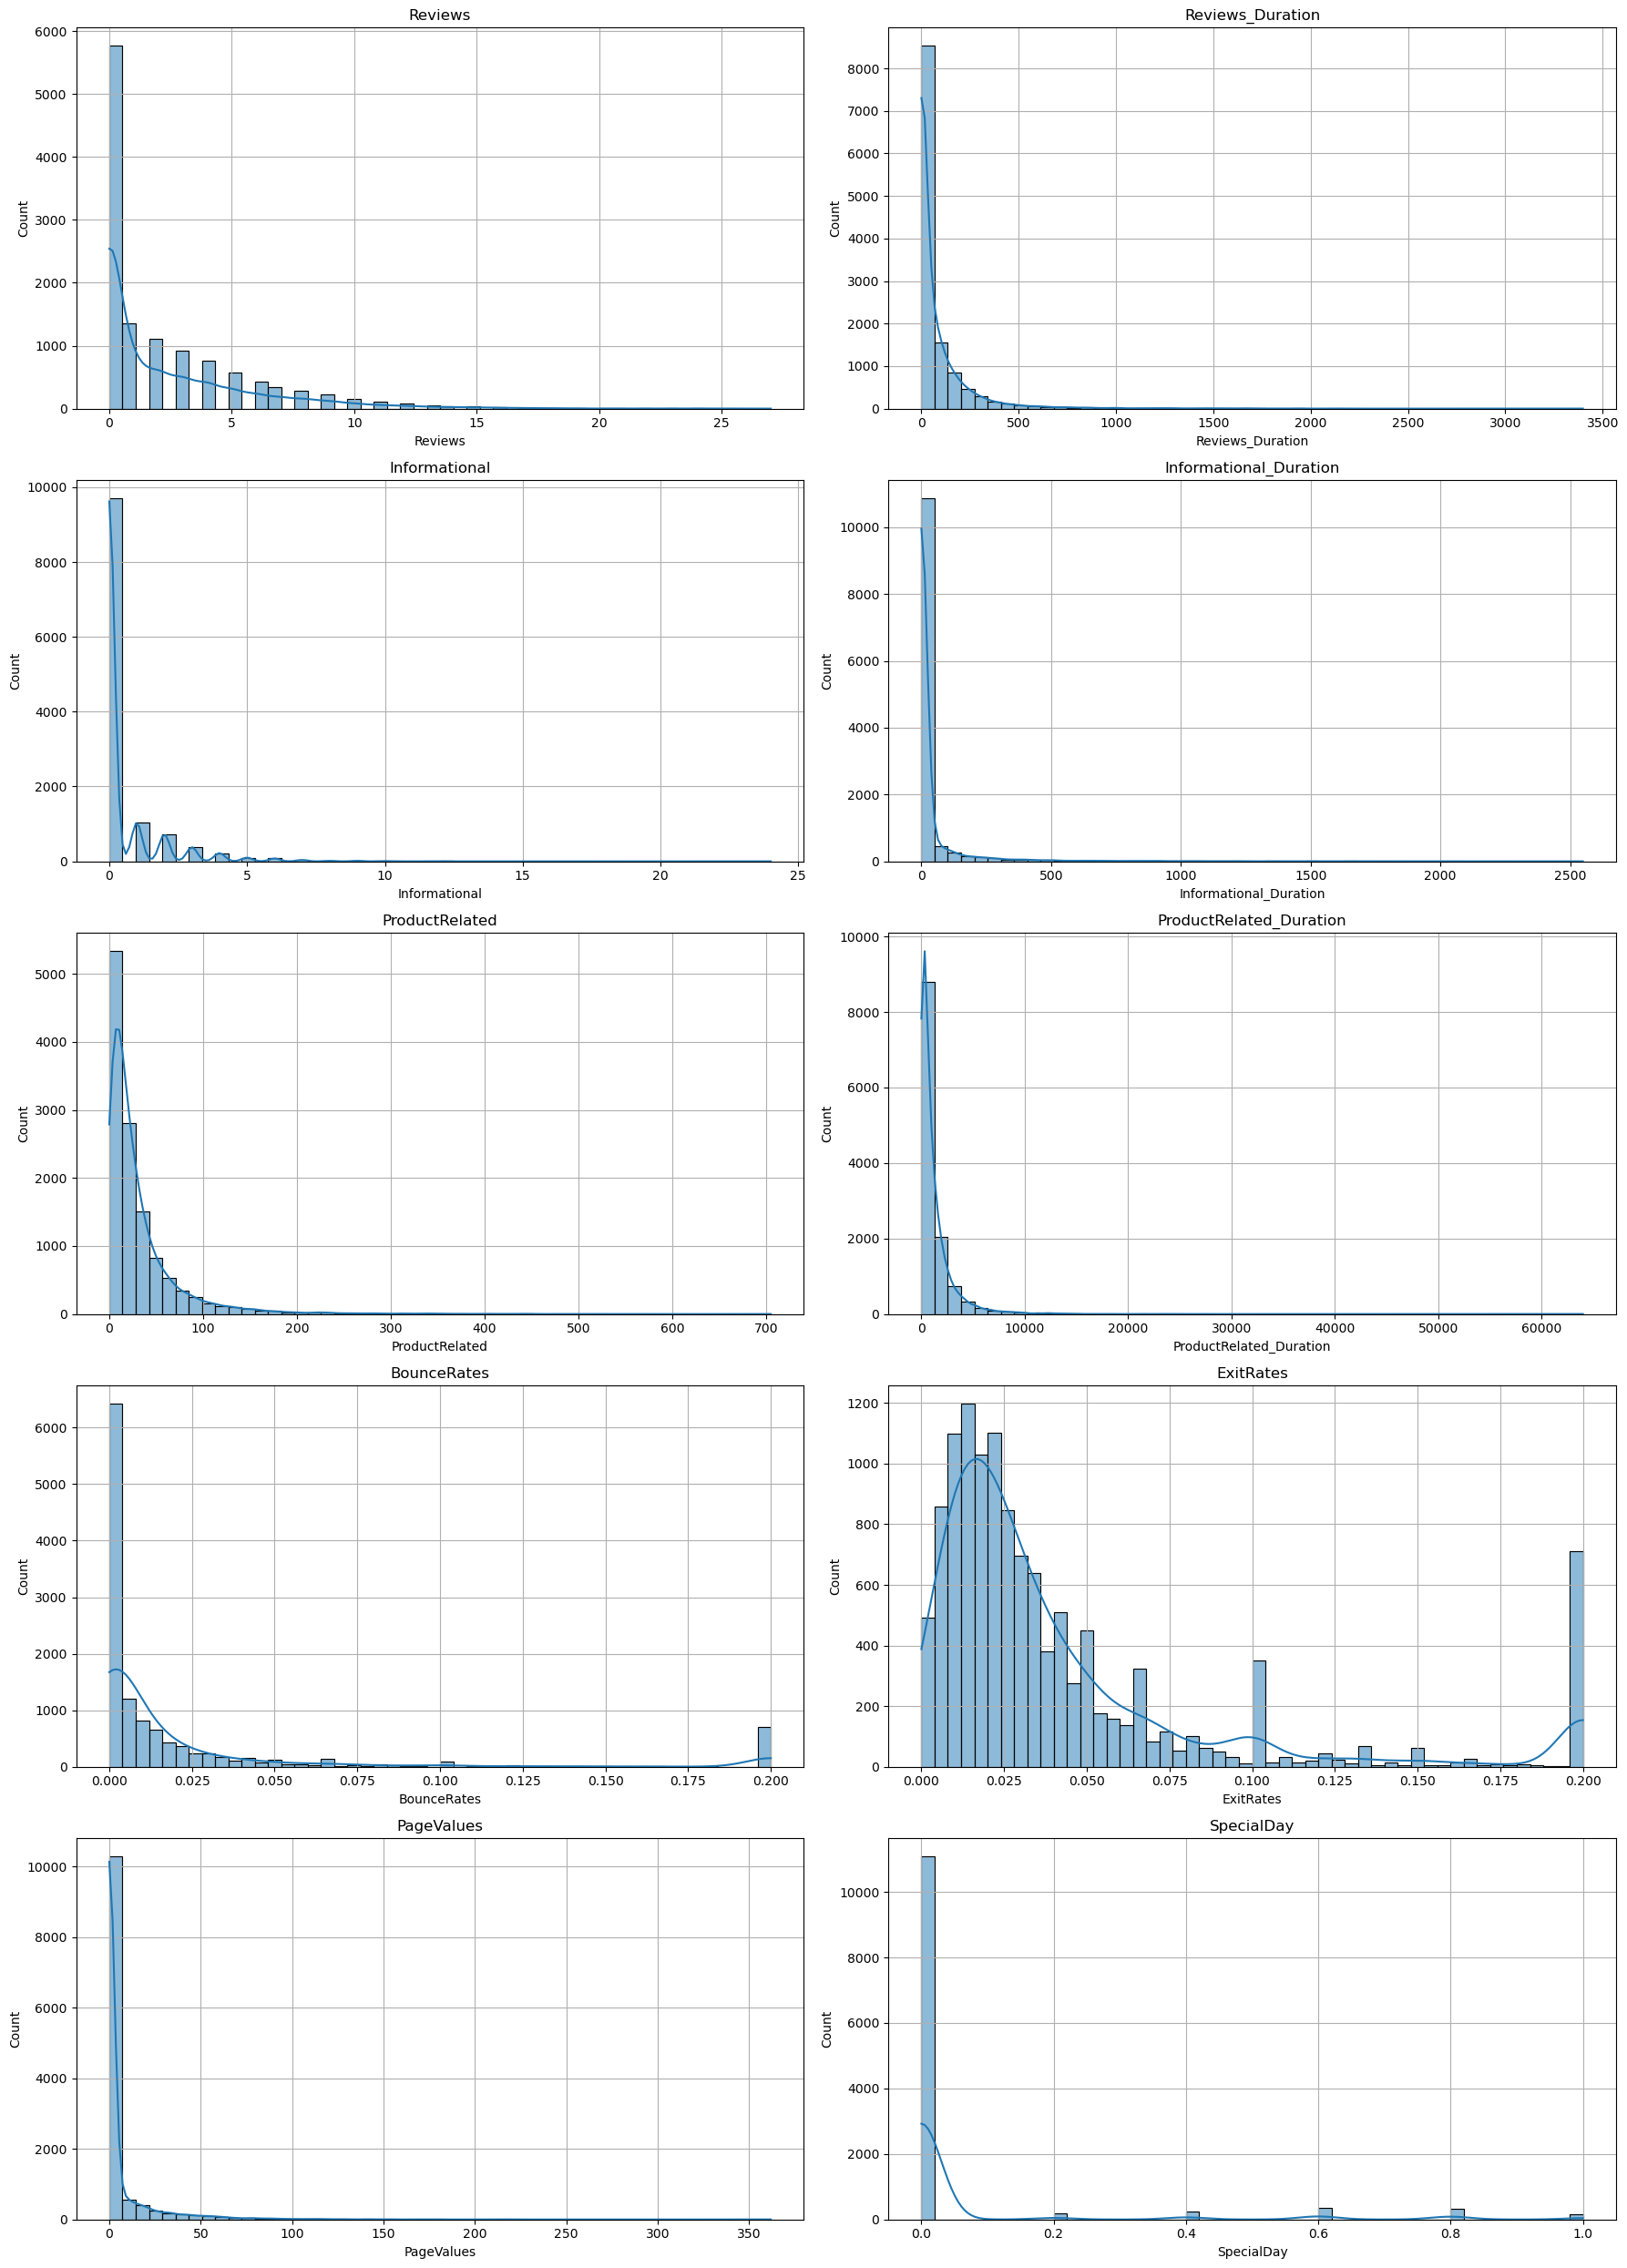

In [668]:
# Histograma de varibales numéricas

nums

# Número de filas y columnas para la matriz de subgráficos
num_filas = 5
num_columnas = 2

# Crear la matriz de subgráficos
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(18, 25))

# Iterar sobre las variables numéricas y graficar histogramas en los subgráficos
for i, variable in enumerate(nums):
    fila = i // num_columnas
    columna = i % num_columnas
    sns.histplot(df_original[variable], bins=50, kde=True, ax=axs[fila, columna])
    axs[fila, columna].set_title(variable)
    axs[fila, columna].grid(True)  # Agregar una grilla

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


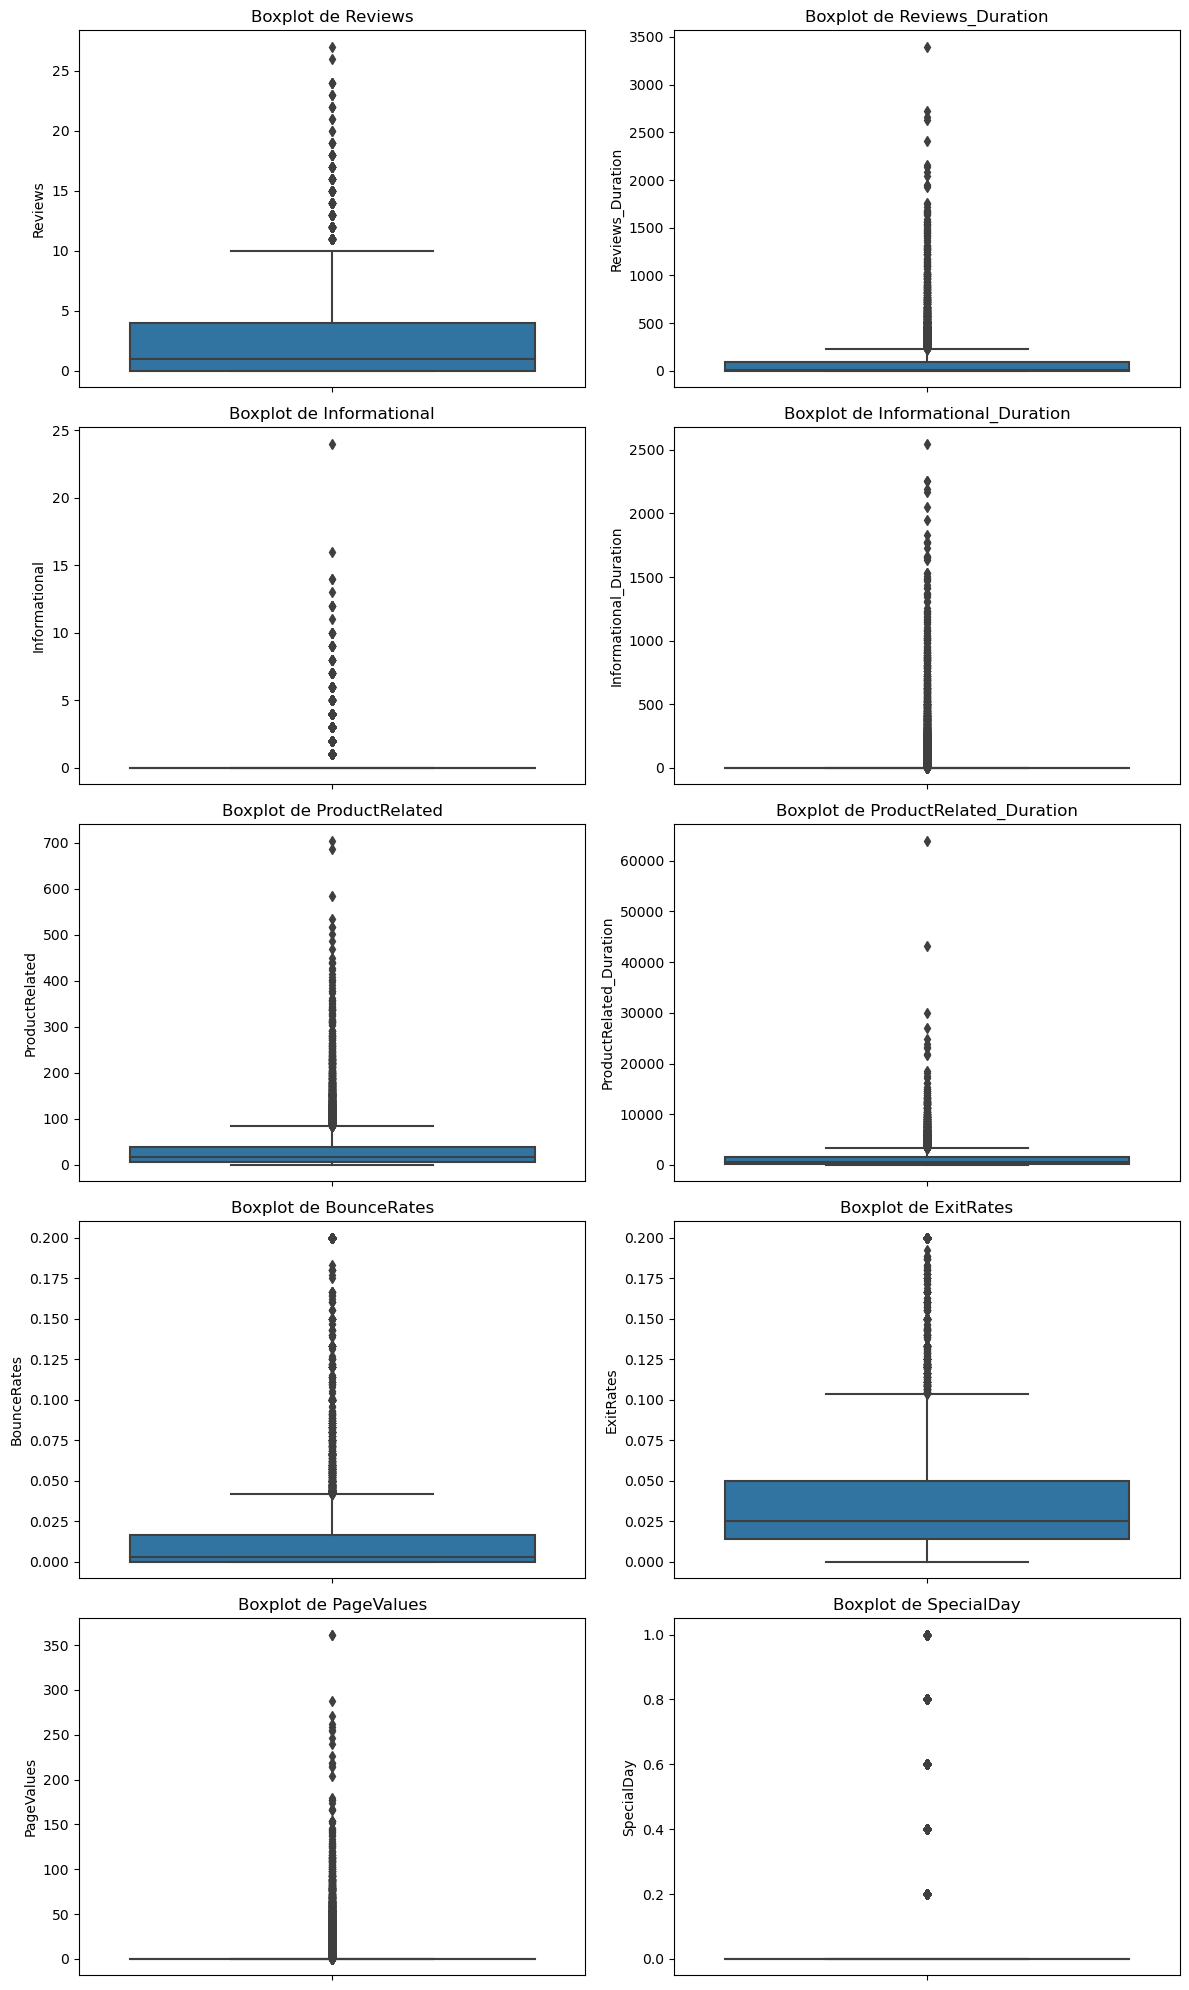

In [669]:
# Boxplot para variables numéricas
fig, axs = plt.subplots(5, 2, figsize=(12, 20))

for i, variable in enumerate(nums):
    fila = i // 2
    columna = i % 2
    
    sns.boxplot(y=df_original[variable], ax=axs[fila, columna])
    axs[fila, columna].set_title(f'Boxplot de {variable}')

colores_pastel = sns.color_palette('rainbow')
plt.tight_layout()
plt.show()


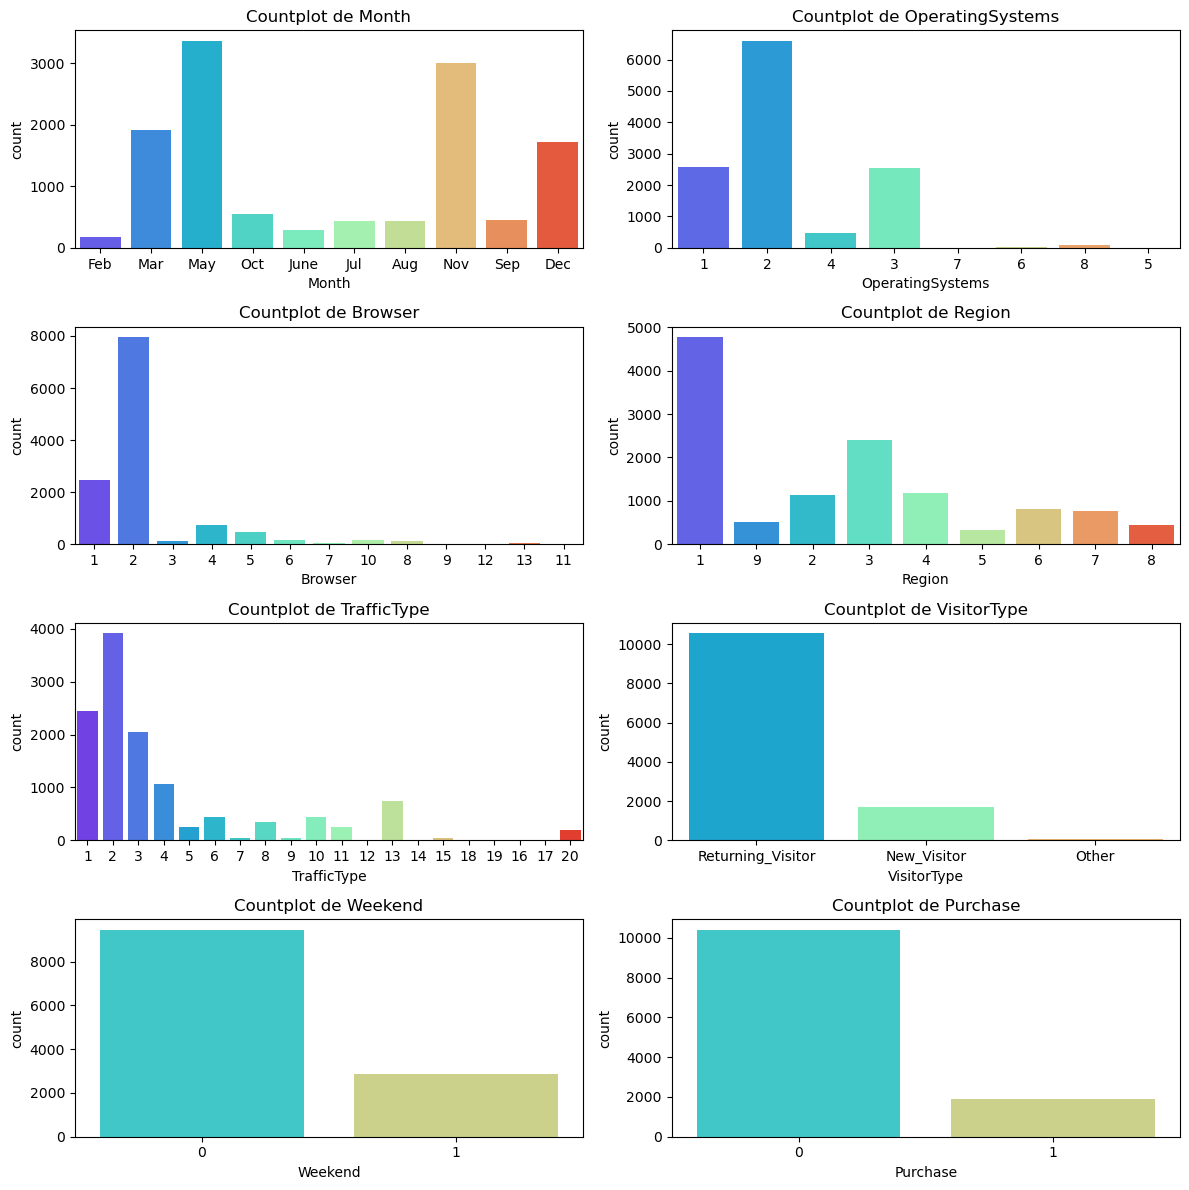

In [670]:
# Countplots para variables categóricas

fig, axs = plt.subplots(4, 2, figsize=(12, 12))

for i, variable in enumerate(cats):
    fila = i // 2
    columna = i % 2
    
    sns.countplot(data=df_original, x=variable, palette='rainbow', ax=axs[fila, columna])
    axs[fila, columna].set_title(f'Countplot de {variable}')

plt.tight_layout()
plt.show()


### <font color='157699'> **Análisis Bivariado** </font>
---

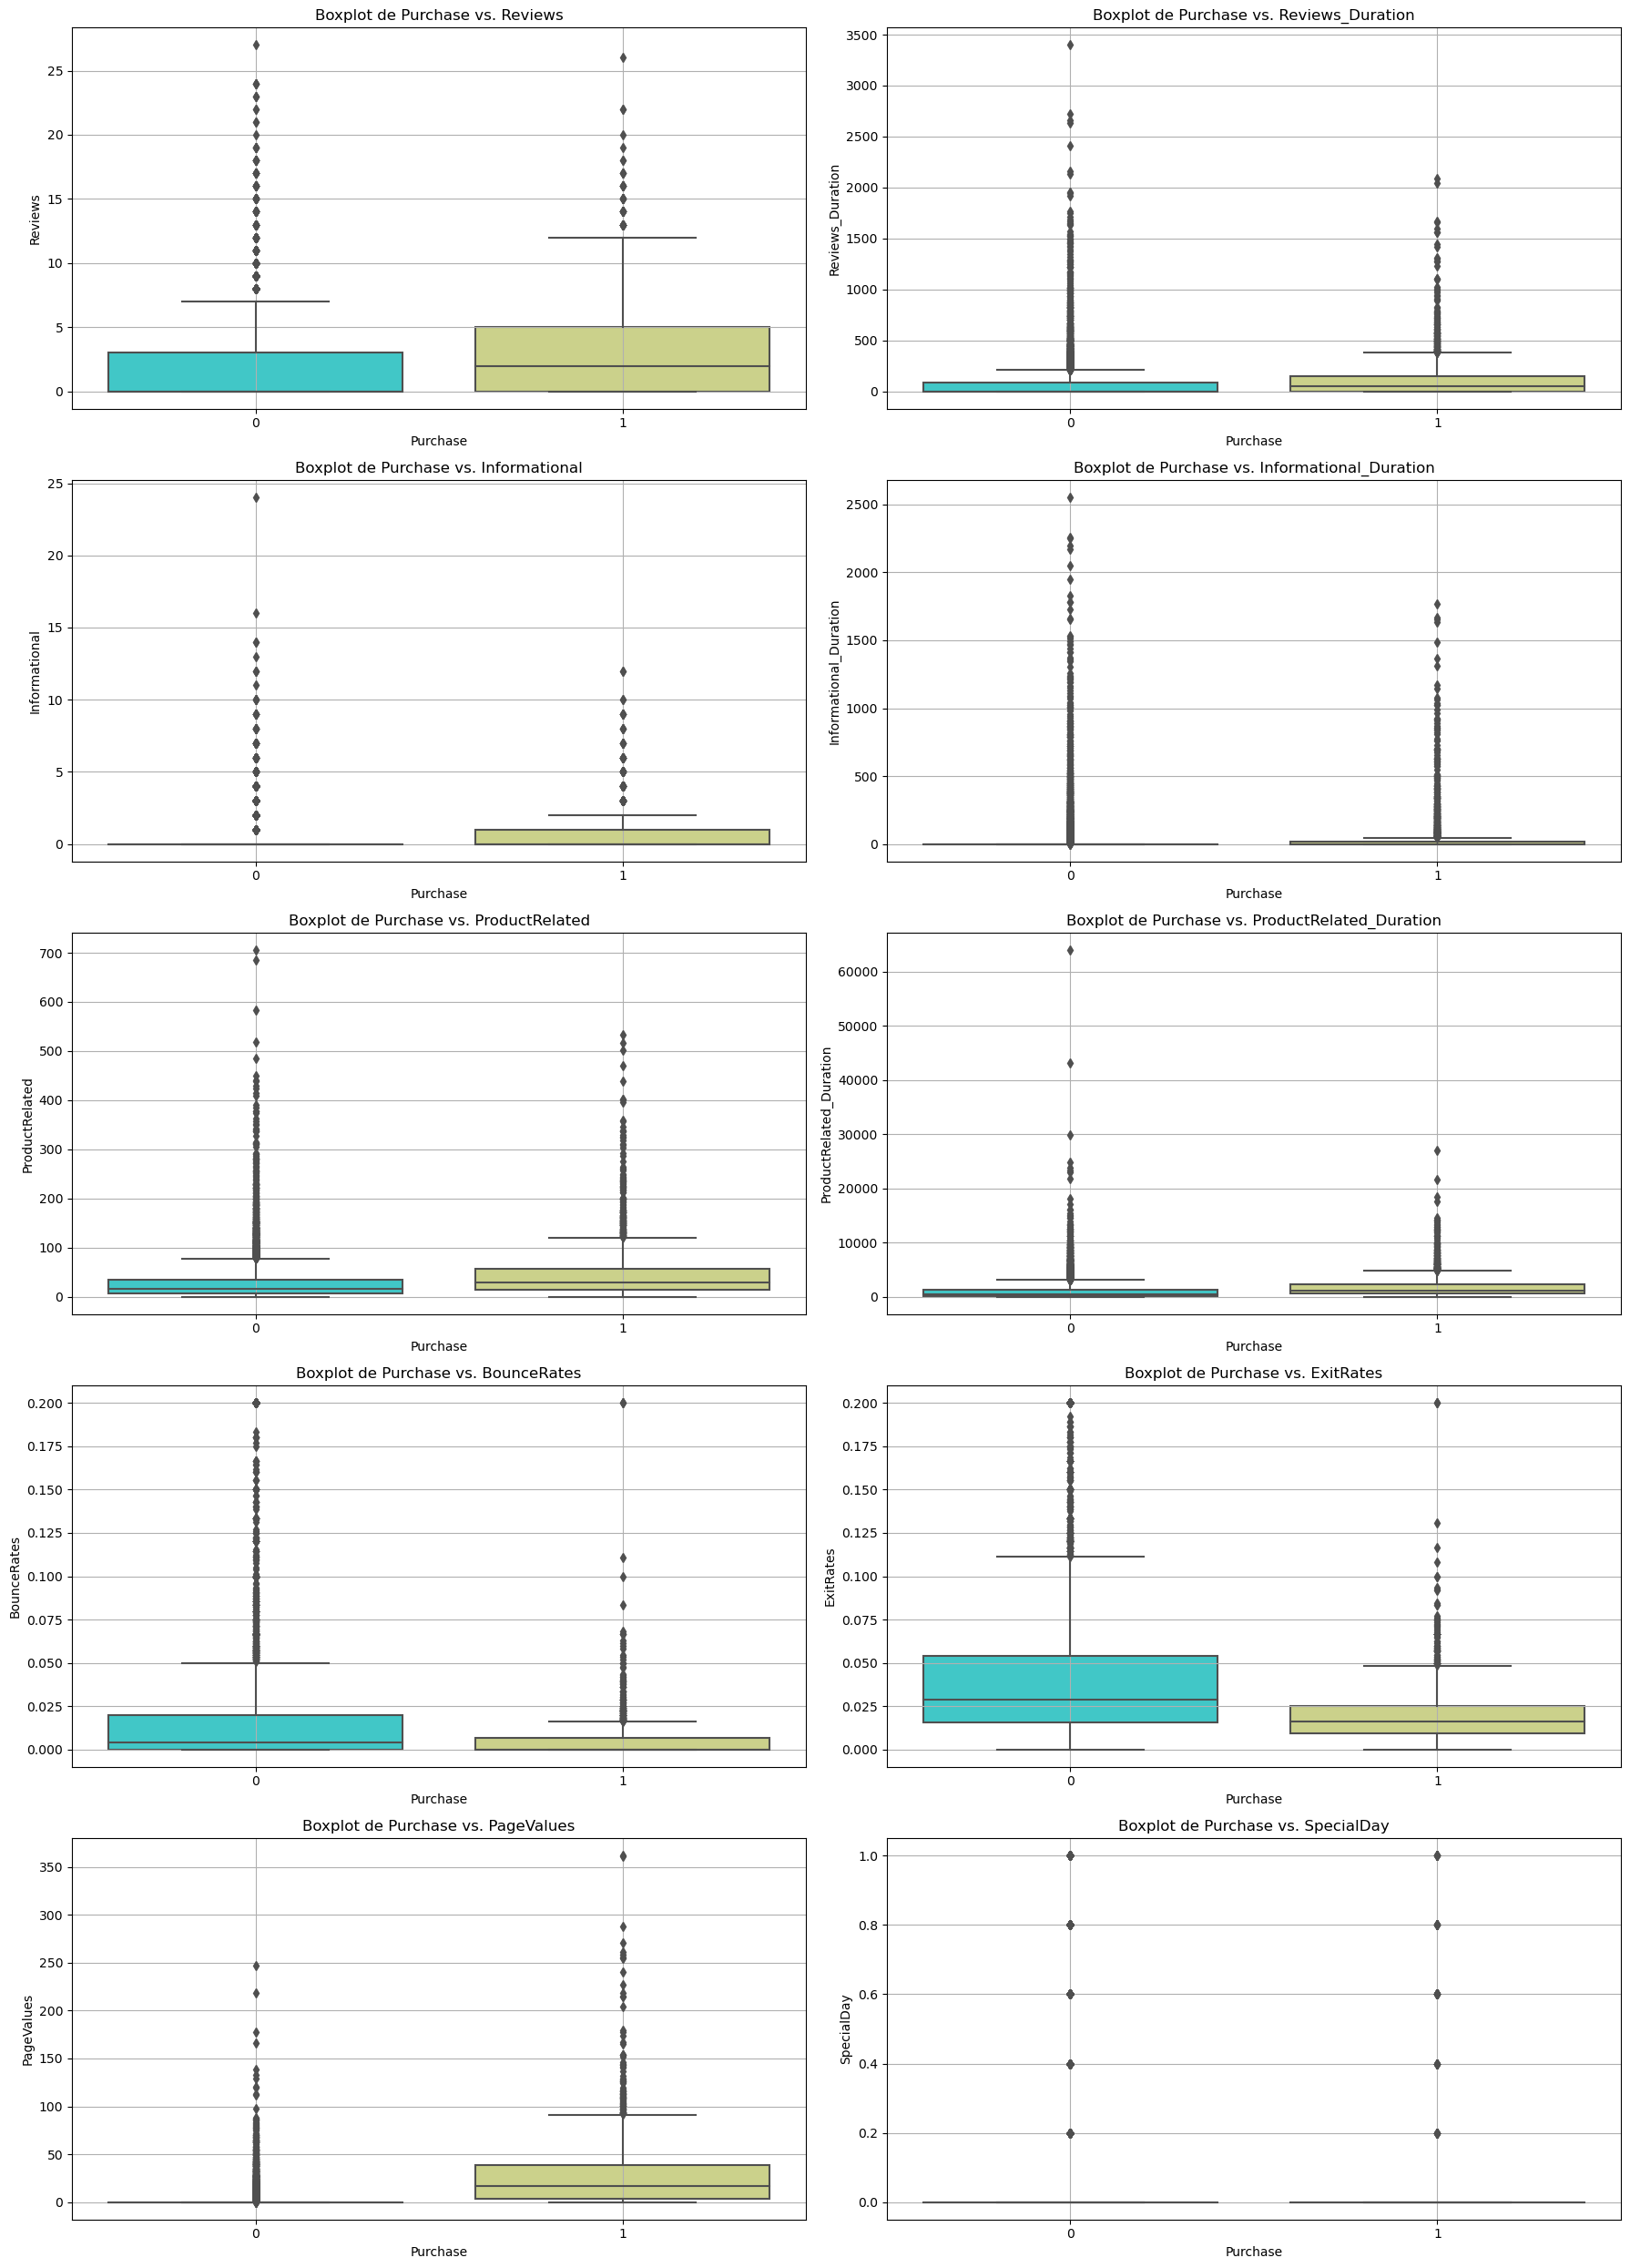

In [671]:
# Variables numéricas a comparar con la variable objetivo "Purchase"
nums

# Número de filas y columnas para la matriz de subgráficos
num_filas = 5
num_columnas = 2

# Crear la matriz de subgráficos
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(18, 25))

# Paleta de colores pastel personalizada (azul y verde)
colores_pastel = sns.color_palette('rainbow')

# Iterar sobre las variables numéricas y graficar boxplots comparativos
for i, variable in enumerate(nums):
    fila = i // num_columnas
    columna = i % num_columnas
    sns.boxplot(x='Purchase', y=variable, data=df_original, ax=axs[fila, columna], palette='rainbow')
    axs[fila, columna].set_title(f'Boxplot de Purchase vs. {variable}')
    axs[fila, columna].grid(True)  # Agregar una grilla

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [672]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [673]:
# Matriz de Correlación

corrmat = df_original.corr()
corrmat

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Purchase
Reviews,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.026417,0.138917
Reviews_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,-0.016767,-0.082305


### <font color='157699'> **Correlación entre Variables** </font>
---

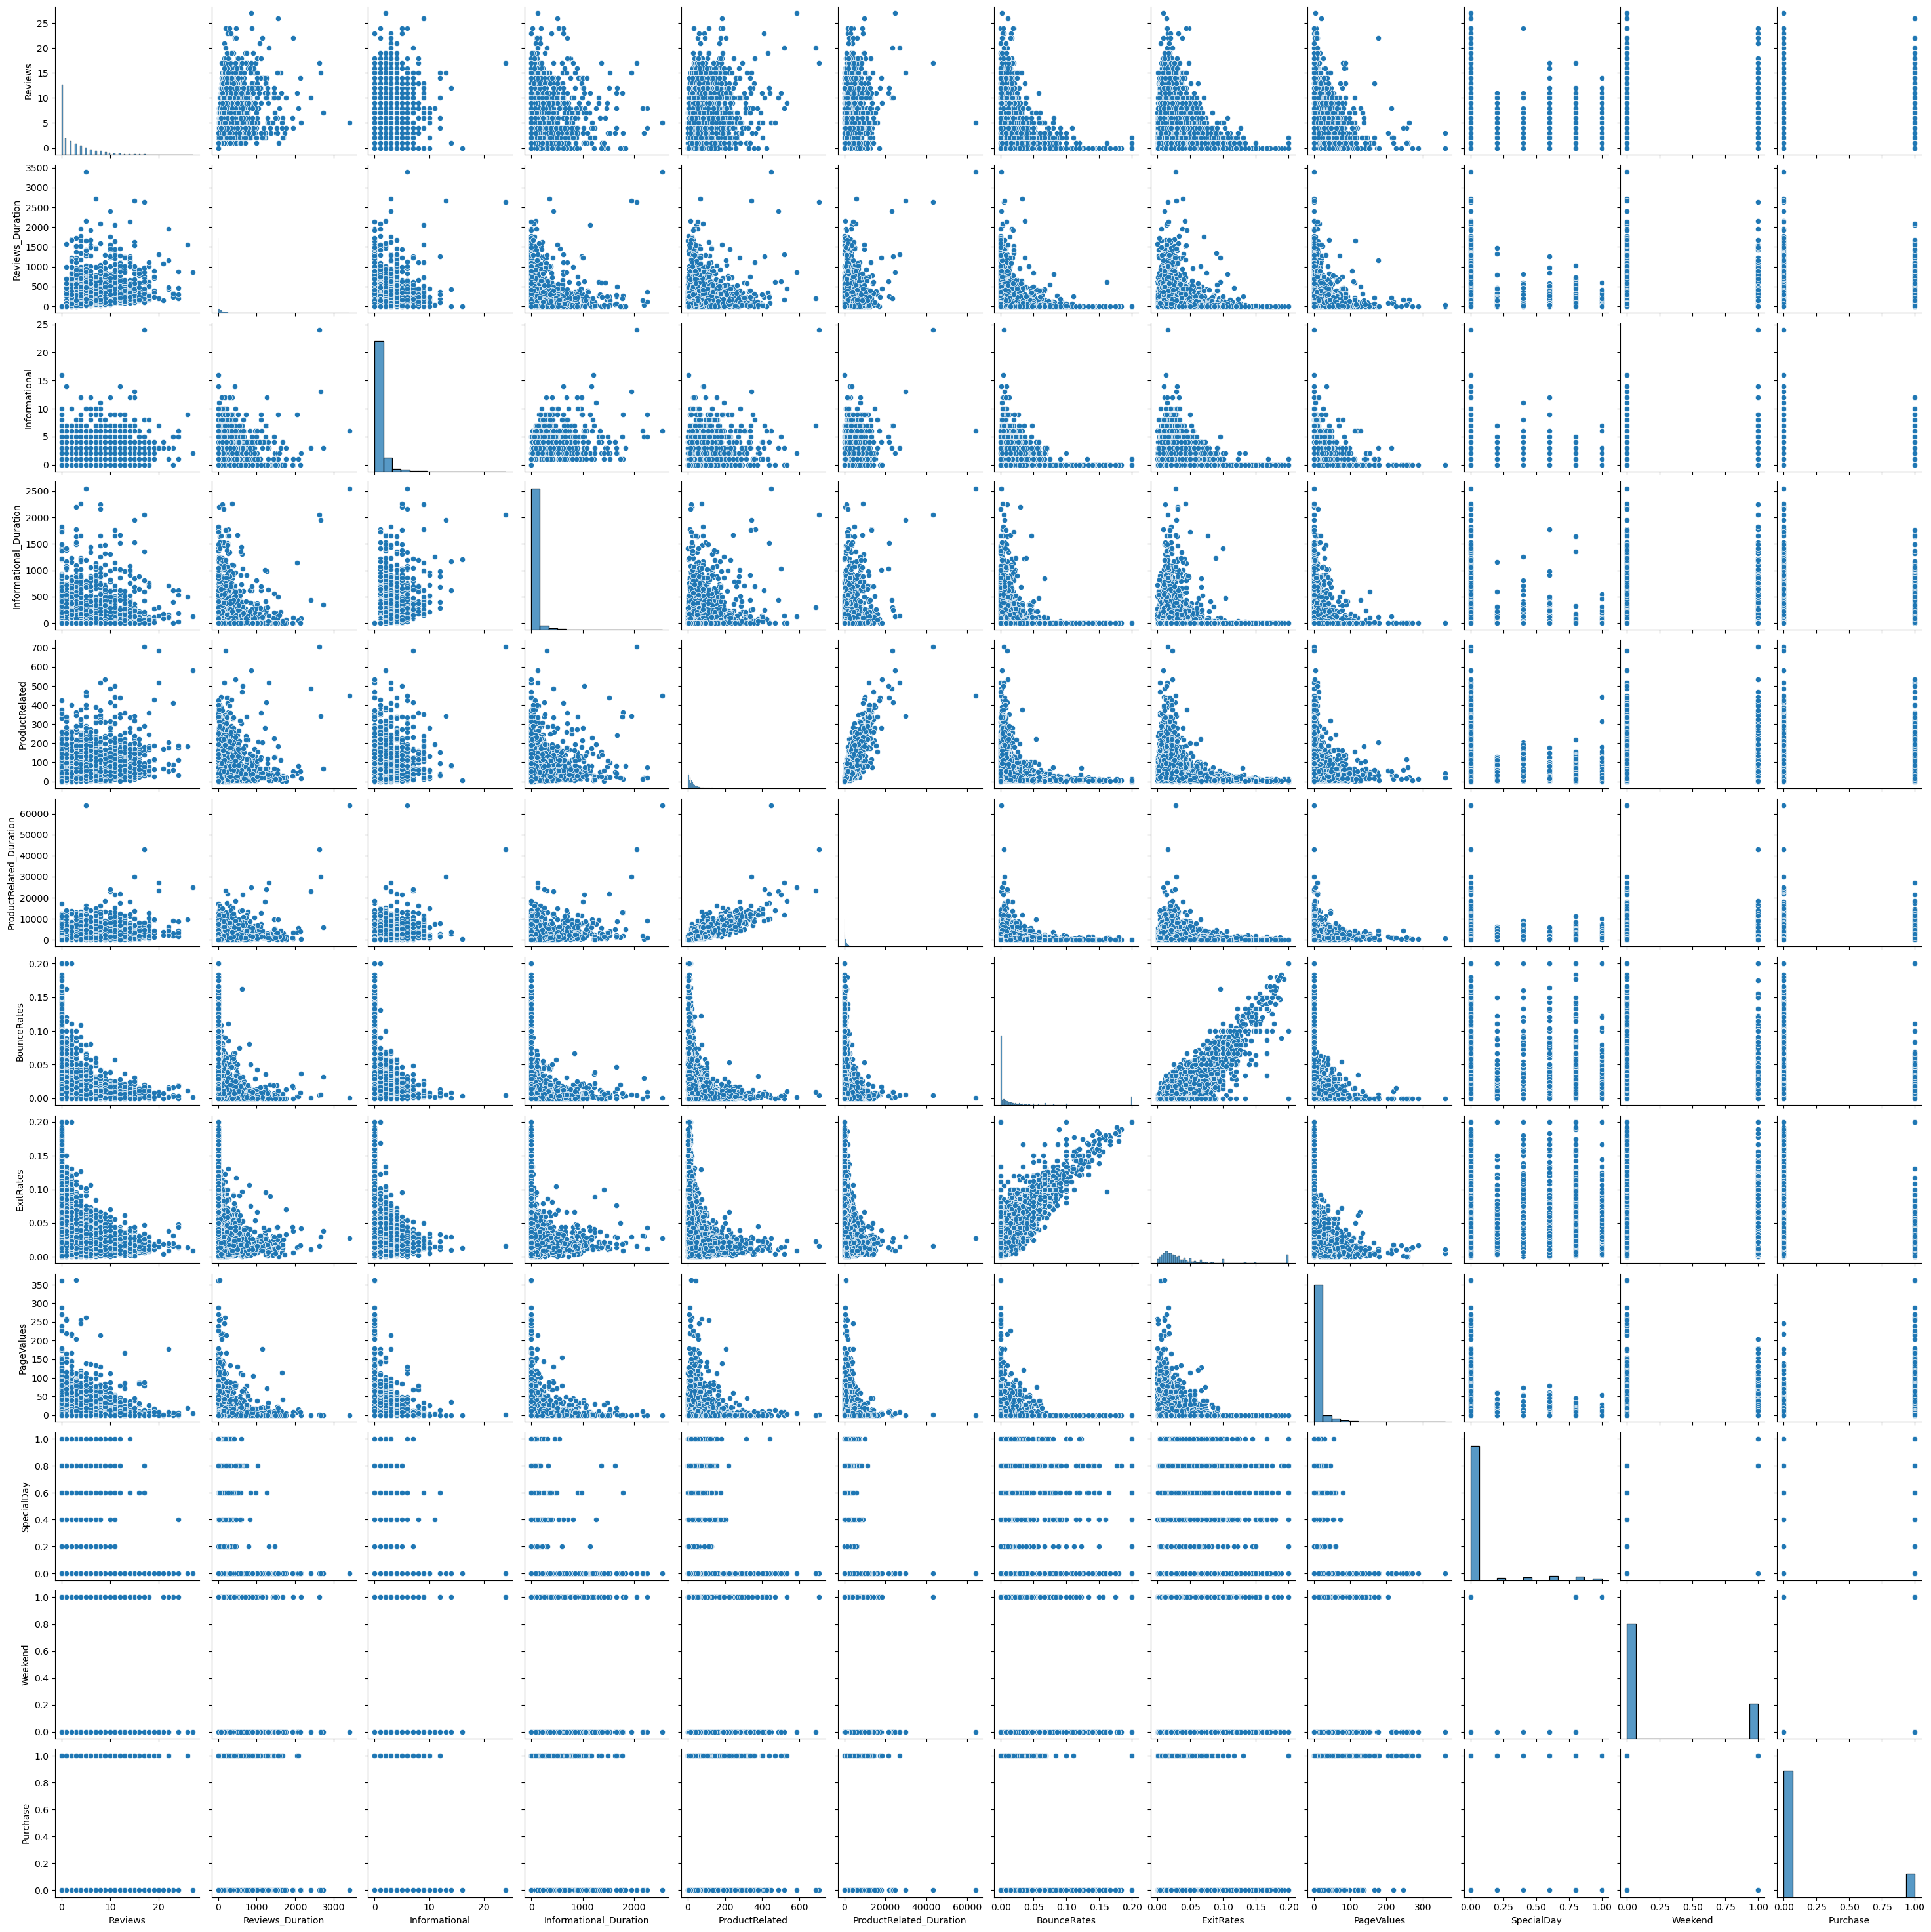

In [674]:
# diagrama de dispersión entre variables numéricas

df_original
sns.pairplot(df_original)
plt.show()

### <font color='157699'> **Matriz de Correlación** </font>
---

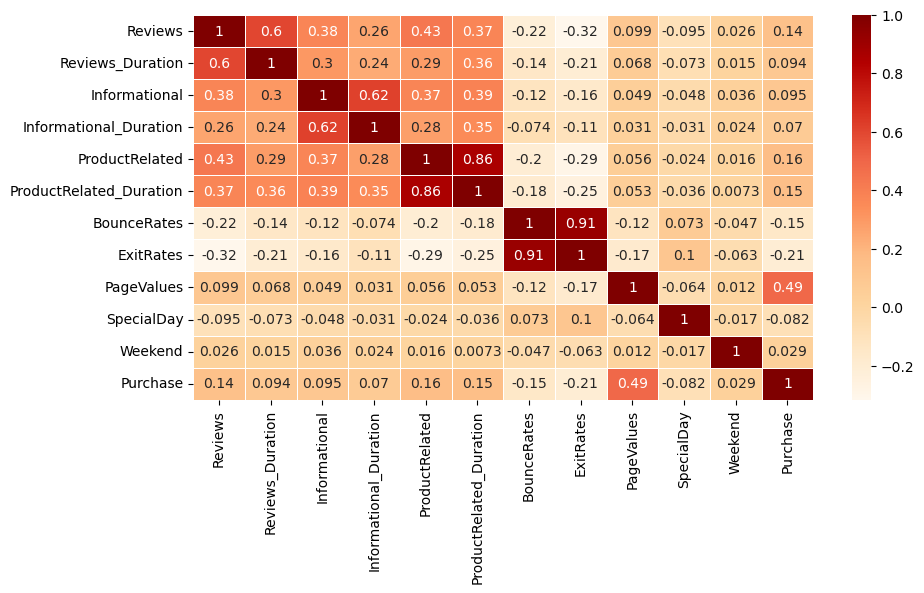

In [675]:
# Heat Map

f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(corrmat, annot = True,  cmap ='OrRd', linewidths=.5)
plt.show()

## <font color='056938'> **Pre-procesamiento de Datos** </font>
---

In [676]:
# Copia del dataset para aplicar transformaciones y limpieza de datos
df1 = df_original.copy()

### <font color='157699'> **Valores Duplicados** </font>
---

In [700]:
# Comprobación de valores duplicados
df1.duplicated().sum()

0

In [678]:
# Eliminación de valores duplicados
df1 = df1.drop_duplicates()

# Comprobación de valores duplicados
df1.duplicated().sum()

0

### <font color='157699'> **Valores Faltantes** </font>
---

In [679]:
# Valores faltantes
df1.isnull().sum()

Reviews                    0
Reviews_Duration           0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Purchase                   0
dtype: int64

### <font color='157699'> **Ceros** </font>
---

In [680]:
# Contar los ceros
for variable in nums:
    num_zeros = (df1[variable] == 0).sum()
    print(f"Número de ceros en la variable '{variable}': {num_zeros}")


Número de ceros en la variable 'Reviews': 5643
Número de ceros en la variable 'Reviews_Duration': 5778
Número de ceros en la variable 'Informational': 9574
Número de ceros en la variable 'Informational_Duration': 9800
Número de ceros en la variable 'ProductRelated': 38
Número de ceros en la variable 'ProductRelated_Duration': 630
Número de ceros en la variable 'BounceRates': 5518
Número de ceros en la variable 'ExitRates': 76
Número de ceros en la variable 'PageValues': 9475
Número de ceros en la variable 'SpecialDay': 10956


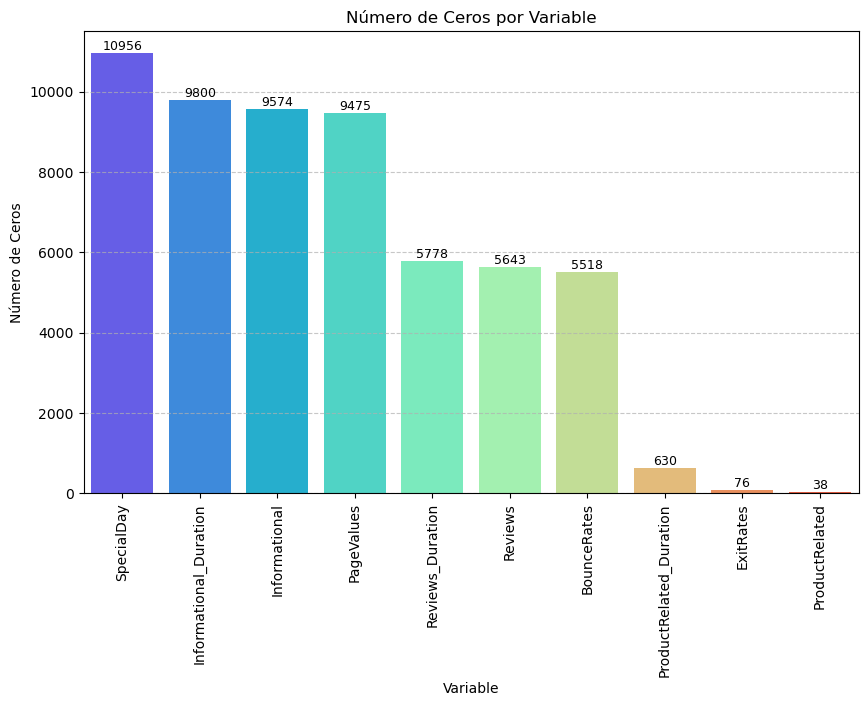

In [681]:
# Gráfico de conteo de ceros
num_zeros_por_variable = []

# Iterar sobre las variables numéricas y contar los ceros
for variable in nums:
    num_zeros = (df1[variable] == 0).sum()
    num_zeros_por_variable.append(num_zeros)

# Ordenar las variables numéricas por el número de ceros de mayor a menor
variables_numericas_ordenadas = [x for _, x in sorted(zip(num_zeros_por_variable, nums), reverse=True)]

# Ordenar el número de ceros de mayor a menor
num_zeros_por_variable_ordenados = sorted(num_zeros_por_variable, reverse=True)

# Crear el gráfico de barras con el formato solicitado
plt.figure(figsize=(10, 6))
sns.barplot(x=variables_numericas_ordenadas, y=num_zeros_por_variable_ordenados, palette='rainbow')
plt.xticks(rotation=90)  # Rotar los nombres de las variables para mayor legibilidad
plt.xlabel('Variable')
plt.ylabel('Número de Ceros')
plt.title('Número de Ceros por Variable')

# Añadir etiquetas a las barras
for i, v in enumerate(num_zeros_por_variable_ordenados):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar grilla en el eje y
plt.show()


### <font color='157699'> **Valores Atípicos** </font>
---

### <font color='157699'> **Winzorizar Valores Atípicos** </font>
---

In [682]:
# Identificación de valores atítico y extremos

from scipy.stats.mstats import winsorize

df_winsorizado = df1.copy()

nums

for variable in nums:
    df_winsorizado[variable] = winsorize(df_winsorizado[variable], limits=[0.05, 0.05])

print(df_winsorizado)


       Reviews  Reviews_Duration  Informational  Informational_Duration  \
0            0               0.0              0                     0.0   
1            0               0.0              0                     0.0   
2            0               0.0              0                     0.0   
3            0               0.0              0                     0.0   
4            0               0.0              0                     0.0   
...        ...               ...            ...                     ...   
12325        3             145.0              0                     0.0   
12326        0               0.0              0                     0.0   
12327        0               0.0              0                     0.0   
12328        4              75.0              0                     0.0   
12329        0               0.0              0                     0.0   

       ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  \
0                   2    

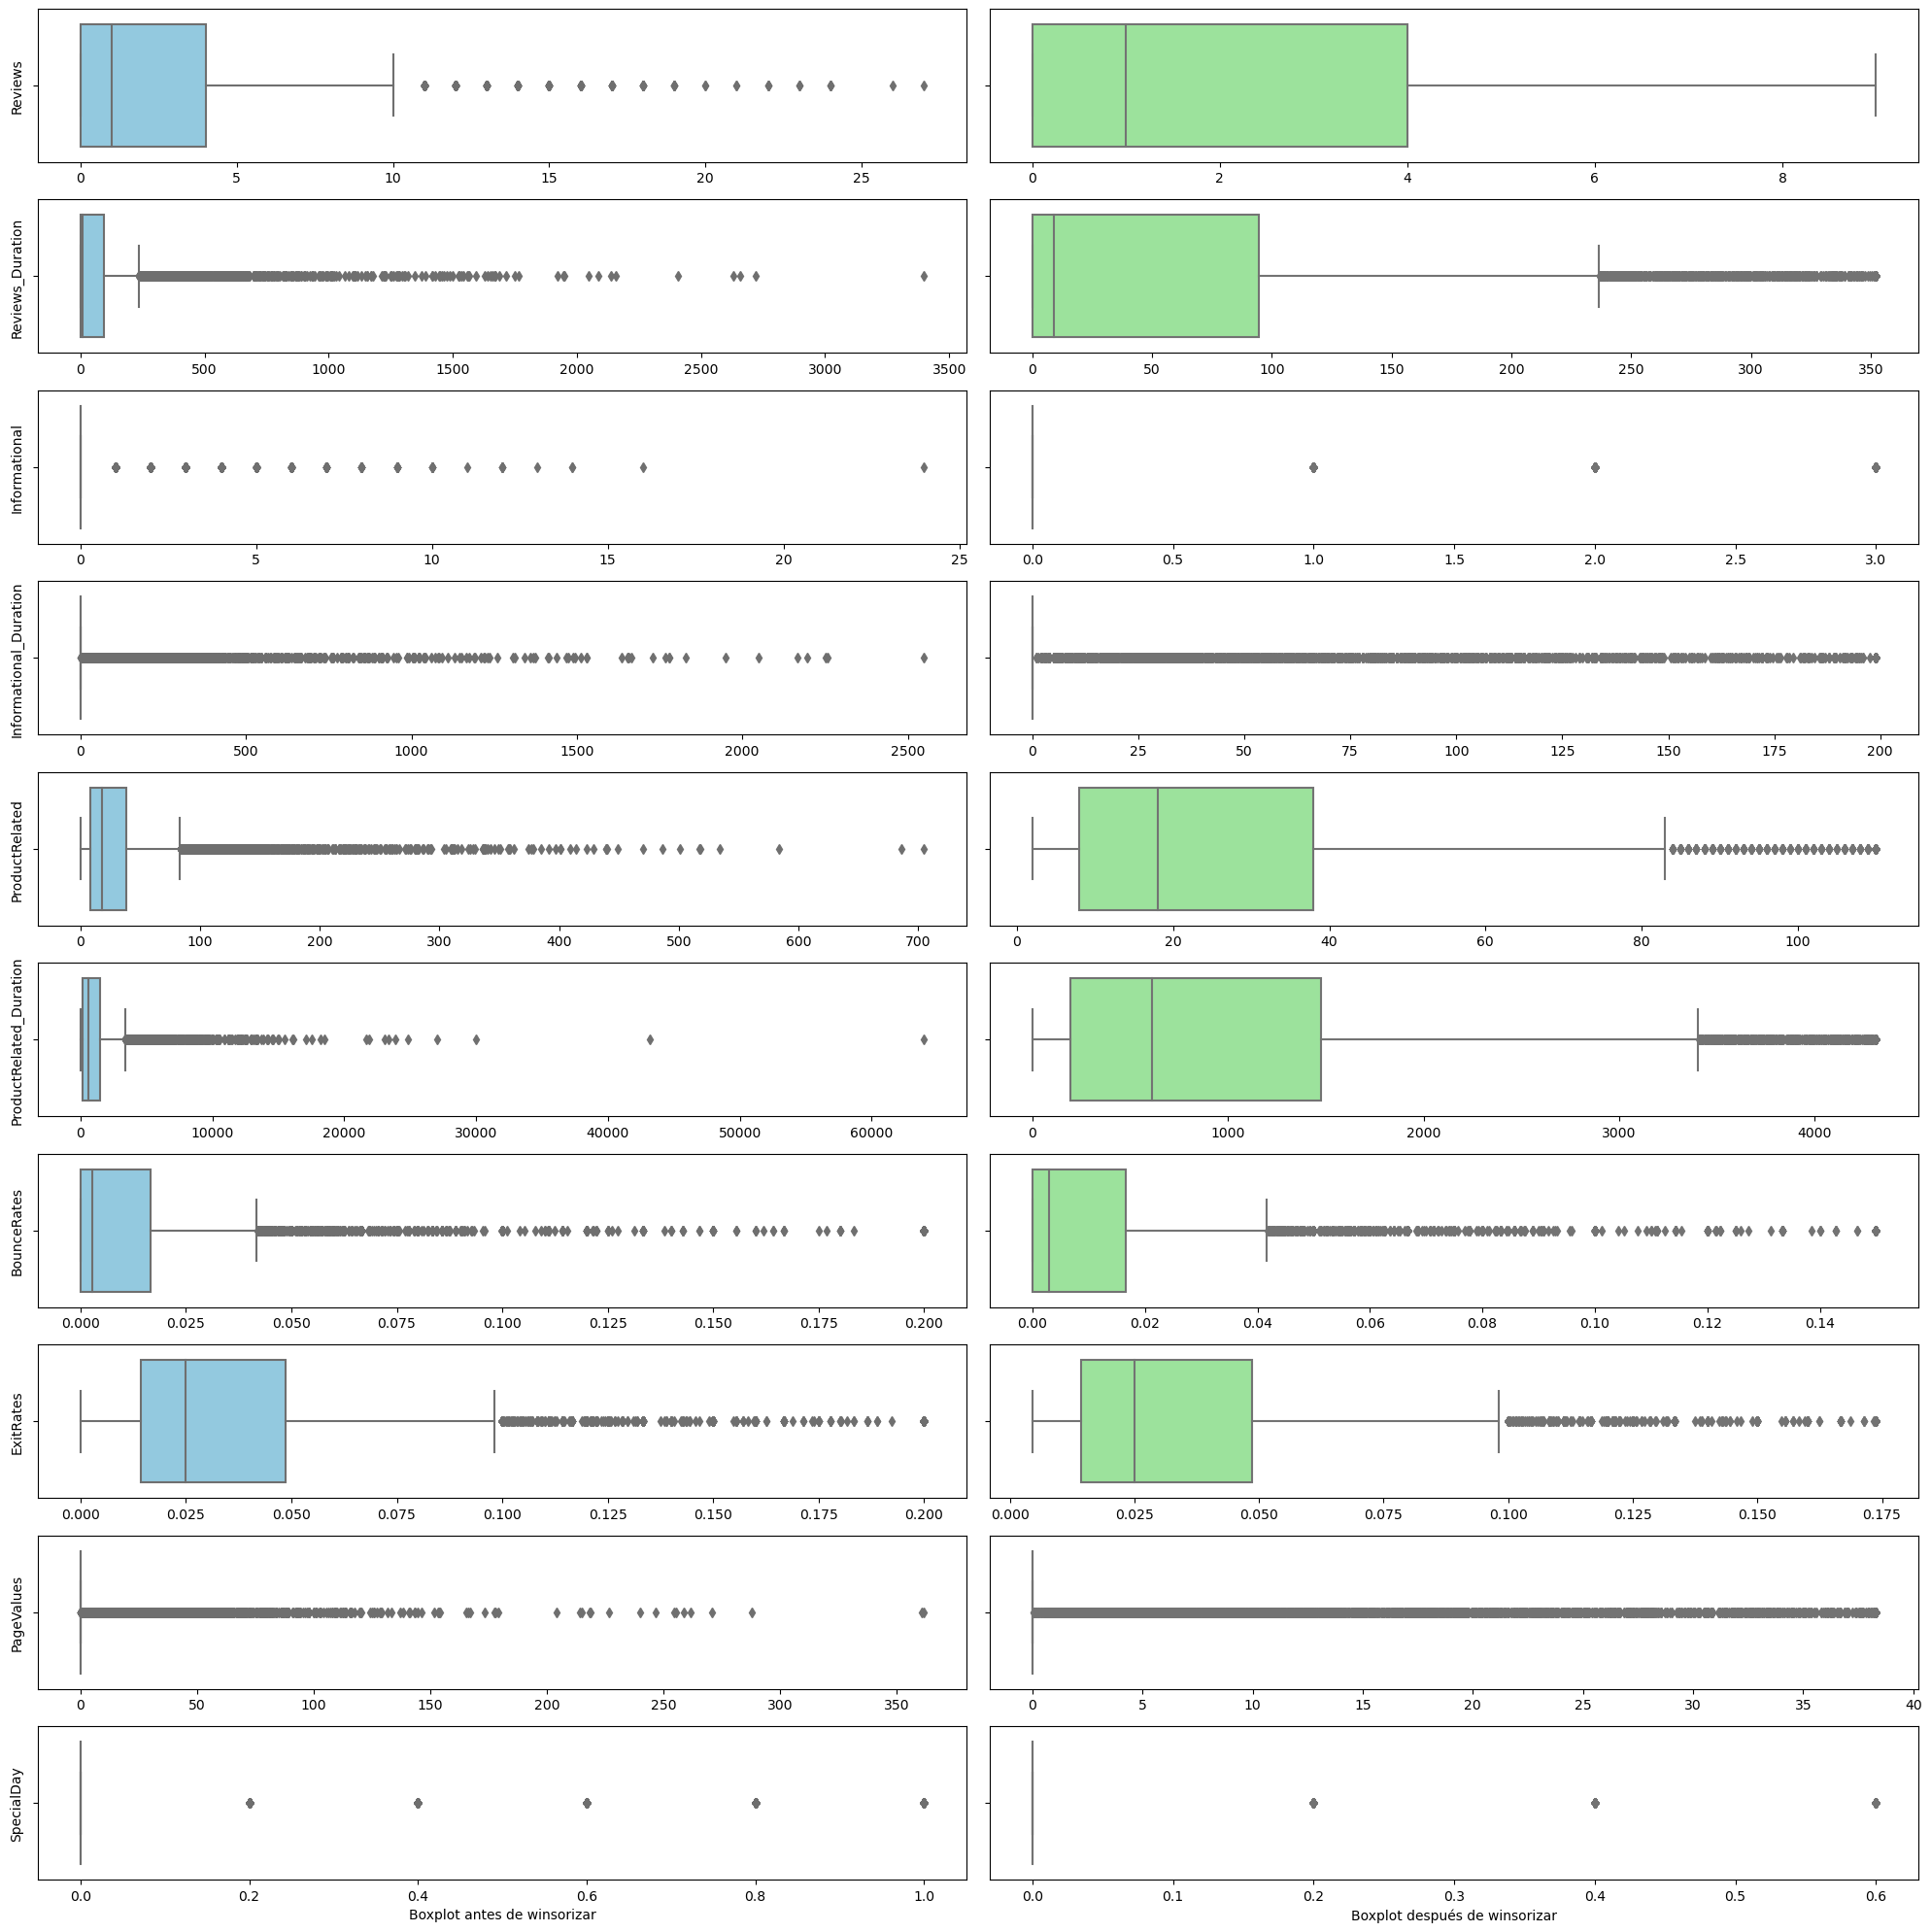

In [683]:
#Comparación de variables winsorizadas

fig, axes = plt.subplots(10, 2, figsize=(20, 20))

nums

for i, variable in enumerate(nums):
    sns.boxplot(data=df1, x=variable, ax=axes[i, 0], color='skyblue')
    sns.boxplot(data=df_winsorizado, x=variable, ax=axes[i, 1], color='lightgreen')

    if i < len(nums) - 1:
        axes[i, 0].set_xlabel('')
        axes[i, 1].set_xlabel('')
    else:
        axes[i, 0].set_xlabel('Boxplot antes de winsorizar')
        axes[i, 1].set_xlabel('Boxplot después de winsorizar')

    axes[i, 0].set_ylabel(variable)
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()


### <font color='157699'> **Separación de Dataframe** </font>
---

In [737]:
df2 = df_winsorizado.copy()

In [738]:
# Varibales booleanas

df2['Weekend'] = df2['Weekend'].astype(bool)
df2['Purchase'] = df2['Purchase'].astype(bool)


In [739]:
# Variables numéricas
df_nums = df2.select_dtypes(include=['int64', 'float64'])

# Variables categóricas
df_cats = df2.select_dtypes(include=['object'])

# Variables booleanas

df_cats = pd.concat([df_cats, df2.select_dtypes(include=['bool'])], axis=1)

### <font color='157699'> **Transformación de variables categóricas a dummies** </font>
---

In [740]:
# Dumificación de las variables categóricas
df_cats_dummies = pd.get_dummies(df_cats)

In [741]:
# Convertir 'Weekend' a booleano
df_cats_dummies['Weekend'] = df_cats_dummies['Weekend'].astype(int)

# Convertir 'Purchase' a booleano
df_cats_dummies['Purchase'] = df_cats_dummies['Purchase'].astype(int)


In [742]:
df_cats_dummies.head(4)

,Weekend,Purchase,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


### <font color='157699'> **Escalado de variables numéricas** </font>
---

In [743]:
# escalado de varibales numéricas

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_nums_scaled = pd.DataFrame(scaler.fit_transform(df_nums), columns=df_nums.columns)


In [744]:
df_nums_scaled.head(4)

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,-0.772898,-0.65759,-0.469731,-0.377151,-0.912101,-0.895916,3.654901,3.189193,-0.422107,-0.322846
1,-0.772898,-0.65759,-0.469731,-0.377151,-0.912101,-0.841764,-0.497856,1.426153,-0.422107,-0.322846
2,-0.772898,-0.65759,-0.469731,-0.377151,-0.912101,-0.895916,3.654901,3.189193,-0.422107,-0.322846
3,-0.772898,-0.65759,-0.469731,-0.377151,-0.912101,-0.893660,0.886396,2.381607,-0.422107,-0.322846


### <font color='157699'> **Concatenado** </font>
---

In [745]:
# Concatenar los DataFrames df_nums_scaled y df_cats_dummies
df_final = pd.concat([df_nums_scaled, df_cats_dummies], axis=1)

In [746]:
df_final.duplicated().sum()

81

In [747]:
# Eliminación de valores duplicados
df_final = df_final.drop_duplicates()

# Comprobación de valores duplicados
df_final.duplicated().sum()

0

In [748]:
df_final.isnull().sum()

Reviews                          110
Reviews_Duration                 110
Informational                    110
Informational_Duration           110
ProductRelated                   110
                                ... 
TrafficType_8                    120
TrafficType_9                    120
VisitorType_New_Visitor          120
VisitorType_Other                120
VisitorType_Returning_Visitor    120
Length: 75, dtype: int64

In [749]:
df_final.dropna()

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.772898,-0.657590,-0.469731,-0.377151,-0.912101,-0.895916,3.654901,3.189193,-0.422107,-0.322846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.772898,-0.657590,-0.469731,-0.377151,-0.912101,-0.841764,-0.497856,1.426153,-0.422107,-0.322846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.772898,-0.657590,-0.469731,-0.377151,-0.912101,-0.895916,3.654901,3.189193,-0.422107,-0.322846,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.772898,-0.657590,-0.469731,-0.377151,-0.912101,-0.893660,0.886396,2.381607,-0.422107,-0.322846,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.772898,-0.657590,-0.469731,-0.377151,-0.638126,-0.364971,0.055845,0.231836,-0.422107,-0.322846,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,0.292842,0.791471,-0.469731,-0.377151,0.834490,0.613399,-0.300106,-0.269046,0.768322,-0.322846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12201,-0.772898,-0.657590,-0.469731,-0.377151,-0.809360,-0.501832,-0.497856,-0.452906,-0.422107,-0.322846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12202,-0.772898,-0.657590,-0.469731,-0.377151,-0.775113,-0.740017,1.809231,1.107669,-0.422107,-0.322846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12203,0.648089,0.091925,-0.469731,-0.377151,-0.466891,-0.603156,-0.497856,-0.459611,-0.422107,-0.322846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [750]:
df_final = df_final.dropna().copy()

In [732]:
df_final

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.772898,-0.657590,-0.469731,-0.377151,-0.912101,-0.895916,3.654901,3.189193,-0.422107,-0.322846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.772898,-0.657590,-0.469731,-0.377151,-0.912101,-0.841764,-0.497856,1.426153,-0.422107,-0.322846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.772898,-0.657590,-0.469731,-0.377151,-0.912101,-0.895916,3.654901,3.189193,-0.422107,-0.322846,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.772898,-0.657590,-0.469731,-0.377151,-0.912101,-0.893660,0.886396,2.381607,-0.422107,-0.322846,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.772898,-0.657590,-0.469731,-0.377151,-0.638126,-0.364971,0.055845,0.231836,-0.422107,-0.322846,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,0.292842,0.791471,-0.469731,-0.377151,0.834490,0.613399,-0.300106,-0.269046,0.768322,-0.322846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12201,-0.772898,-0.657590,-0.469731,-0.377151,-0.809360,-0.501832,-0.497856,-0.452906,-0.422107,-0.322846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12202,-0.772898,-0.657590,-0.469731,-0.377151,-0.775113,-0.740017,1.809231,1.107669,-0.422107,-0.322846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12203,0.648089,0.091925,-0.469731,-0.377151,-0.466891,-0.603156,-0.497856,-0.459611,-0.422107,-0.322846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### <font color='157699'> **Desbalanceo de Clases** </font>
---

In [751]:
# Conteo de ocurrencias para la variable objetivo "Purchase"

conteo_purchase = df_final['Purchase'].value_counts()
print("Conteo de ocurrencias para la variable 'Purchase':")
print(conteo_purchase)


Conteo de ocurrencias para la variable 'Purchase':
0.0    10131
1.0     1888
Name: Purchase, dtype: int64


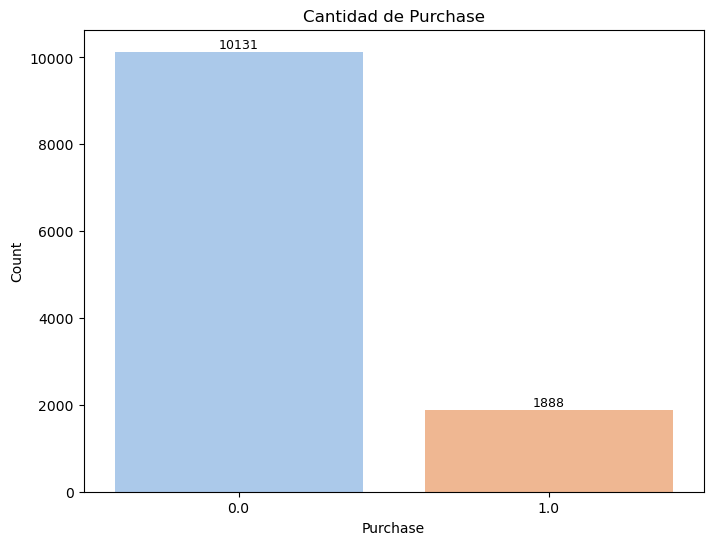

In [752]:
# Conteo de la varibale objetivo Purchase

# Colores personalizados para las barras
colores = sns.color_palette('pastel', len(conteo_purchase))

# Crear el gráfico de barras con los mismos colores
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=conteo_purchase.index, y=conteo_purchase.values, palette=colores)

# Añadir etiquetas y título
plt.xlabel('Purchase')
plt.ylabel('Count')
plt.title('Cantidad de Purchase')

# Añadir etiquetas a las barras
for i, v in enumerate(conteo_purchase.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=9)

# Mostrar el gráfico
plt.show()


In [767]:
from imblearn.under_sampling import RandomUnderSampler

x = df_final.drop('Purchase', axis=1)
y = df_final['Purchase']
rus = RandomUnderSampler()
x_resampled, y_resampled = rus.fit_resample(x, y)

In [779]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

print('Tamaño del conjunto de entrenamiento: ', x_train.shape)
print('Tamaño del conjunto de validación: ', x_test.shape)

Tamaño del conjunto de entrenamiento:  (3020, 74)
Tamaño del conjunto de validación:  (756, 74)


In [790]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
model_RegLog = LogisticRegression(max_iter=10000)

# Ajustar el modelo a los datos
model_RegLog.fit(x_train, y_train)

# Desempeño en el entrenamiento
y_train_pred = model_RegLog.predict(x_train)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred) )

Exactitud en el entrenamiento: 0.651


In [791]:
y_pred = model_RegLog.predict(x_test)

# Exactitud en el conjunto de validación
print('Exactitud en la validación: %.3f'  %accuracy_score(y_test, y_pred) )

Exactitud en la validación: 0.630


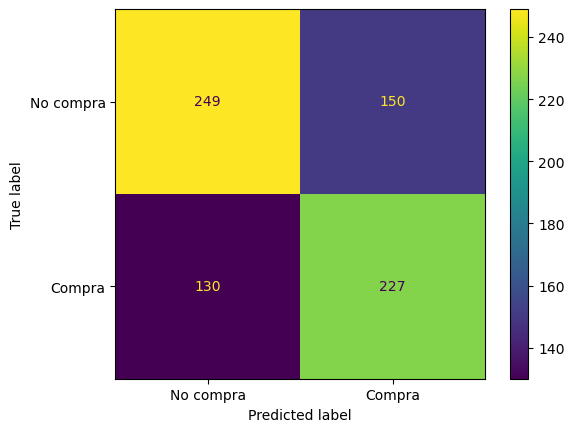

In [783]:
# confusion_matrix = para graficar la matríz de confusión
# ConfusionMatrixDisplay = para que la matríz quede bonita

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mc = confusion_matrix(y_test, y_pred)

mc_display = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels=['No compra', 'Compra'])
mc_display.plot()
plt.show()

In [774]:
tn, fp, fn, tp = mc.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.6021220159151194
Recall: 0.6358543417366946
Especificidad: 0.6240601503759399
F1 score: 0.6185286103542234


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))

  return X_new